In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

In [2]:
# Creating a Series by passing a list
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.012266,-0.939839,-0.607884,0.113395
2013-01-02,0.333026,0.138016,-0.134400,-0.245556
2013-01-03,-0.234731,0.515631,-1.785180,-0.623284
2013-01-04,0.180153,0.678544,-0.232118,0.226923
2013-01-05,-0.080013,-0.078797,0.392270,-0.729747
2013-01-06,1.486977,-1.890631,0.458700,0.015455


In [10]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [13]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

## Viewing Data

In [16]:
df.head(1)

,A,B,C,D
2013-01-01,-1.600256,-1.096921,-1.339623,-0.019126


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.982018,0.477984,0.233490,-0.972977
2013-01-05,1.111458,-1.730076,-0.215516,-0.257365
2013-01-06,0.525386,0.552670,1.660155,-1.318603


In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
# Describe a quick statistic summary of your data
df.values

array([[-1.60025576, -1.0969214 , -1.3396228 , -0.01912642],
       [ 1.42014385, -0.43876383, -1.36974637, -0.95392671],
       [-1.92254658,  0.70495346, -0.50096134, -0.19274736],
       [-1.98201849,  0.47798396,  0.23349005, -0.97297665],
       [ 1.11145834, -1.73007616, -0.21551584, -0.2573651 ],
       [ 0.52538611,  0.5526705 ,  1.66015473, -1.31860344]])

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.407972,-0.255026,-0.255367,-0.619124
std,1.594674,1.002951,1.130271,0.529007
min,-1.982018,-1.730076,-1.369746,-1.318603
25%,-1.841974,-0.932382,-1.129957,-0.968214
50%,-0.537435,0.019610,-0.358239,-0.605646
75%,0.964940,0.533999,0.121239,-0.208902
max,1.420144,0.704953,1.660155,-0.019126


In [22]:
# Transposing your data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.600256,1.420144,-1.922547,-1.982018,1.111458,0.525386
B,-1.096921,-0.438764,0.704953,0.477984,-1.730076,0.552670
C,-1.339623,-1.369746,-0.500961,0.233490,-0.215516,1.660155
D,-0.019126,-0.953927,-0.192747,-0.972977,-0.257365,-1.318603


In [23]:
df.T.index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [34]:
# Sorting by an axis
df.sort_index(axis=0)

,A,B,C,D
2013-01-01,-1.600256,-1.096921,-1.339623,-0.019126
2013-01-02,1.420144,-0.438764,-1.369746,-0.953927
2013-01-03,-1.922547,0.704953,-0.500961,-0.192747
2013-01-04,-1.982018,0.477984,0.233490,-0.972977
2013-01-05,1.111458,-1.730076,-0.215516,-0.257365
2013-01-06,0.525386,0.552670,1.660155,-1.318603


In [35]:
# Sorting by values
df.sort_values(by='B')

,A,B,C,D
2013-01-05,1.111458,-1.730076,-0.215516,-0.257365
2013-01-01,-1.600256,-1.096921,-1.339623,-0.019126
2013-01-02,1.420144,-0.438764,-1.369746,-0.953927
2013-01-04,-1.982018,0.477984,0.233490,-0.972977
2013-01-06,0.525386,0.552670,1.660155,-1.318603
2013-01-03,-1.922547,0.704953,-0.500961,-0.192747


In [39]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [40]:
df['2013-01-02':'2013-01-04']

,A,B,C,D
2013-01-02,1.420144,-0.438764,-1.369746,-0.953927
2013-01-03,-1.922547,0.704953,-0.500961,-0.192747
2013-01-04,-1.982018,0.477984,0.233490,-0.972977


<Figure size 432x288 with 0 Axes>

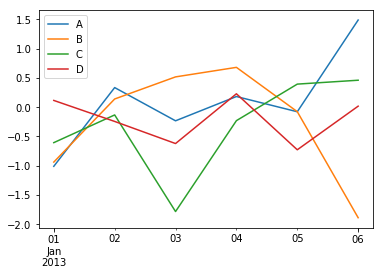

In [6]:
plt.figure()
df.plot()

In [7]:
df.to_csv('df.csv')